# Problema de los 100 prisioneros

El dilema de los 100 prisioneros y 100 cajones es un problema en la teoría de la probabilidad y la combinatoria. Consiste en que cada uno de 100 prisioneros debe encontrar su número en uno de los 100 cajones para sobrevivir y si alguno no lo encuentra, todos morirán; y, cada prisionero puede abrir sólo 50 cajones y no puede comunicarse con los demás prisioneros, excepto en el debate previo de la estrategia. 

### Enunciado:
El director de una prisión ofrece a un centenar de condenados a muerte (numerados del 1 al 100) una última oportunidad. En una sala hay un armario con 100 cajones. El director coloca aleatoriamente en cada cajón uno de los números de 1 a 100. Los prisioneros entran en la sala, uno tras otro. Cada uno de los prisioneros puede: abrir y comprobar sólo 50 cajones en cualquier orden, y después cierra todos los cajones. Si en esta búsqueda todos los prisioneros han encontrado respectivamente su número, todos los prisioneros son perdonados; si un prisionero no encontrara su número, todos los prisioneros serán ejecutados. Antes de que el primer prisionero busque su número, los prisioneros pueden discutir la estrategia, pero no pueden comunicarse a partir de este momento. ¿Cuál es la mejor estrategia de los prisioneros? 

### Solución:

Sorprendentemente existe una estrategia que proporciona la probabilidad de supervivencia de más del 30%. La clave del éxito radica en el hecho de que los prisioneros no necesitan decidir de antemano cuáles cajones abrir: cada prisionero puede utilizar la información recibida del contenido de los cajones ya abiertos, para decidir cuál abrir después. Otra importante observación es que el éxito de un prisionero no es independiente del éxito de otros prisioneros, ya que todo depende de cómo se distribuyeron los números en los cajones.

La estrategia descrita cubre no sólo los prisioneros, sino también los cajones numerados del 1 al 100 (por ejemplo, hilera por hilera, a partir del primer cajón de la esquina superior izquierda del armario). La estrategia a seguir es:

- Cada prisionero, primero abre el cajón con su número.
- Si este cajón contiene su número, el prisionero ha concluido con éxito.
- En caso contrario, el cajón contiene un número de otro prisionero, y se abre el cajón con dicho número.
- El prisionero repite los pasos 2 y 3 hasta que encuentre su número o hasta abrir los 50 cajones.

Comenzando con su propio número el prisionero se garantiza de seguir una secuencia de apertura de cajones en el que pueda eventualmente encontrar su número. La única cuestión reside en si la secuencia es mayor de 50. 

https://es.wikipedia.org/wiki/Problema_de_los_100_prisioneros

### Librerías:

In [436]:
import numpy as np
import matplotlib.pyplot as plt

### Variables:

In [437]:
#Se crean las 100 cajas:
cajas = np.arange(100) 

#Se desordenan las cajas aleatoriamente:
np.random.shuffle(cajas)

# Creo esta lista para saber cuáles cajas ya han sido abiertas y así no repetir procesos con esas cajas, 
# pues se sabe que pertenecen a un bucle previamente recorrido.
cajas_abiertas = []

In [438]:
cajas

array([52, 53, 90, 31, 76, 61, 98, 18, 69, 49, 10, 51, 71,  2, 43,  7, 44,
       94, 36,  1,  8, 70, 38, 64, 62, 14, 95,  4, 35, 88, 40, 22, 27, 97,
       42, 20, 54, 99, 32, 23,  9,  3, 33, 92, 86, 39, 77,  6, 91, 83, 13,
       57, 82, 78, 58, 87, 75, 84, 41, 56, 63, 21, 25, 73, 48, 55, 81, 79,
       24, 15, 74, 29, 34, 68, 60, 65, 47, 46, 16, 26, 30, 50, 72, 80, 11,
       17, 96, 59, 89, 67, 66,  0, 85, 93, 37, 12, 45, 28,  5, 19])

### Función para saber el tamaño de un bucle:    

In [439]:
# Recordemos que si el tamaño de uno de los bucles es > 50, entonces no hay posibilidad de éxito

def contar_bucle(nro_preso): 
    contador = 1

    nro_caja = nro_preso # La primera caja que se abre, es la que corresponde al numero del preso
    cierre = False


    while(cierre == False): # Mientras no haya ido encontrado el final del bucle:

        if(cajas[nro_caja] == nro_preso): # Si el numero dentro de la caja coincide con el numero del preso, el bucle finalizó.
            cierre = True # El final del bucle fue encontrado.
            cajas_abiertas.append(nro_caja) # Se guarda el numero de la caja para saber que el bucle al que pertenece ya fue recorrido.

            return contador

        else: # Si el final del bucle no fue encontrado:
            cajas_abiertas.append(nro_caja) # Se guarda el numero de la caja para saber que el bucle al que pertenece ya fue recorrido.
            nro_caja=cajas[nro_caja] # La próxima caja a ser abierta será la que tenga el número que estaba dentro de la caja 
                                     # que se acaba de abrir.
            contador+=1 

### Función para hacer x cantidad de veces el reto:

In [440]:
def funcion(nro_intentos):

    global cajas_abiertas
    fracasos = 0 # Guarda el número de fracasos

    for i in range (nro_intentos): # Se repite 'nro_intentos' veces
        
        for j in range (99): 
            if not j in (cajas_abiertas): # Sólo se usan lo números que no pertenezcan a bucles previamente recorridos
                if contar_bucle(j) > 50: #Si el tamaño del bucle es > 50, entonces no hay posibilidad de éxito
                    fracasos += 1 # + 1 fracaso

        np.random.shuffle(cajas) # Se desordenan las cajas para hacer el próximo intento
        cajas_abiertas = [] # Reseteo la lista de cajas abiertas

    return fracasos

### Puesta en práctica:

In [452]:
nro_intentos = 10000 # Cantidad de veces que se quiere hacer la prueba

fracasos = funcion(nro_intentos)
exitos = nro_intentos - fracasos

print('Exitos:',exitos)
print('Fracasos:',fracasos)

Exitos: 3158
Fracasos: 6842


### Visualización de resultados:

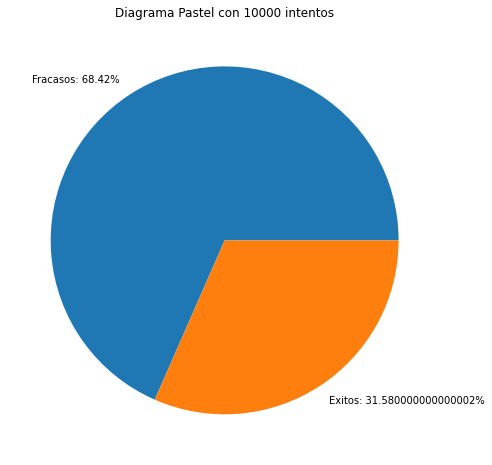

In [454]:
fig = plt.figure(figsize=(12,8))
fig.patch.set_facecolor('white')
plt.pie([fracasos, exitos], labels=[f'Fracasos: {(fracasos/nro_intentos)*100}%',  f'Exitos: {(exitos/nro_intentos)*100}%'])
plt.title(f'Diagrama Pastel con {nro_intentos} intentos')
plt.show()